In [369]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [370]:
merged_df = pd.read_csv('merged.csv')

In [371]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
companies = set(col.split('-')[0] for col in merged_df.columns if 'Price' in col)

/var/folders/dc/zvwyc6hj1lb8z33y8dt2g0jw0000gn/T/ipykernel_11173/1191677804.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  benchmark['BAMLCC0A1AAATRIV'].replace('.', pd.NA, inplace=True)


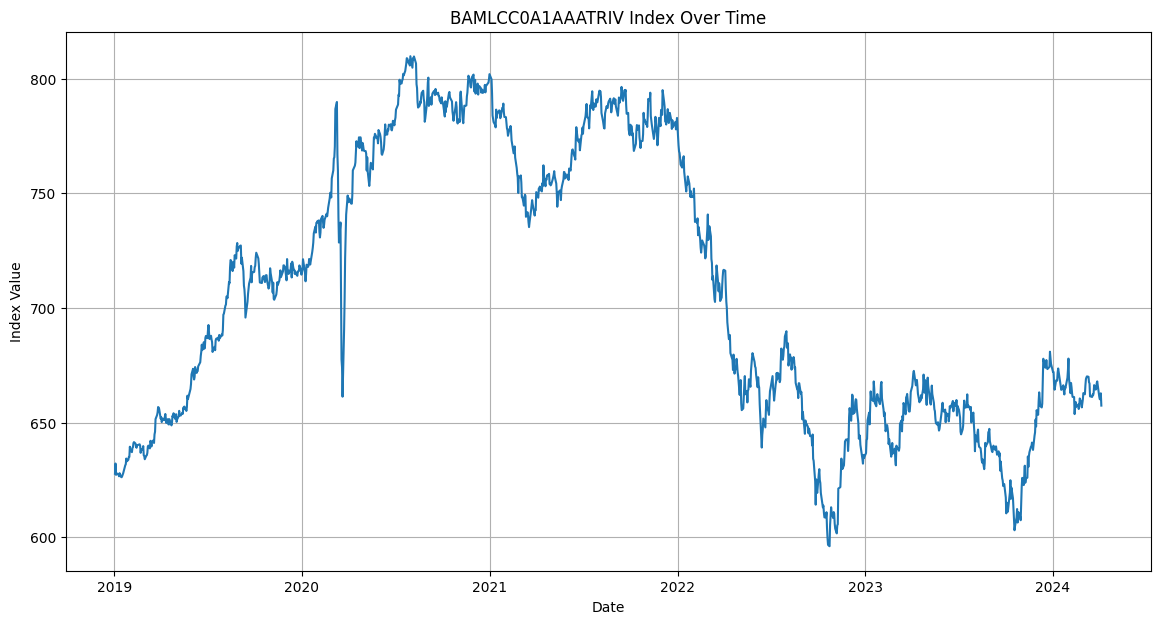

In [372]:

benchmark = pd.read_csv('benchmark.csv')
benchmark['Date'] = pd.to_datetime(benchmark['Date'], format='%m/%d/%y')
benchmark['BAMLCC0A1AAATRIV'].replace('.', pd.NA, inplace=True)
benchmark.dropna(subset=['BAMLCC0A1AAATRIV'], inplace=True)
benchmark['BAMLCC0A1AAATRIV'] = benchmark['BAMLCC0A1AAATRIV'].astype(float)
plt.figure(figsize=(14,7))
plt.plot(benchmark['Date'], benchmark['BAMLCC0A1AAATRIV'])
plt.title('BAMLCC0A1AAATRIV Index Over Time')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.grid(True)
plt.show()

In [373]:
n = 14  # what period should we use for stochastic?

for company in companies:
    close_col = f'{company}-Price'
    
    high_n = merged_df[close_col].rolling(window=n).max()
    low_n = merged_df[close_col].rolling(window=n).min()
    
    merged_df[f'{company}-%K'] = ((merged_df[close_col] - low_n) / (high_n - low_n)) * 100
    merged_df[f'{company}-%D'] = merged_df[f'{company}-%K'].rolling(window=3).mean()

merged_df.to_csv('osc_merged.csv')

merged_df.head(20)

,Unnamed: 0,Date,XOM-Price,XOM-Yield,TSLA-Price,TSLA-Yield,LLY-Price,LLY-Yield,AAPL-Price,AAPL-Yield,...,LLY-%K,LLY-%D,V-%K,V-%D,JPM-%K,JPM-%D,TSLA-%K,TSLA-%D,AMZN-%K,AMZN-%D
0,0,2019-01-02,96.727,3.299,69.879,11.403,96.732,3.320,100.954,3.253,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-03,97.207,3.212,70.389,11.270,96.941,3.283,101.039,3.236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2019-01-04,96.661,3.312,71.510,10.967,96.669,3.332,100.570,3.332,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2019-01-07,96.522,3.338,73.343,10.482,96.387,3.383,100.582,3.329,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2019-01-08,96.228,3.393,74.650,10.145,96.293,3.400,100.506,3.345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,2019-01-09,96.453,3.351,76.726,9.623,96.550,3.354,100.760,3.292,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,2019-01-10,96.651,3.316,77.490,9.440,96.395,3.383,100.739,3.297,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,2019-01-11,96.949,3.261,77.911,9.339,96.655,3.336,100.869,3.270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,2019-01-14,96.877,3.274,77.507,9.439,96.640,3.339,100.896,3.264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,2019-01-15,96.937,3.263,76.994,9.568,96.600,3.347,100.983,3.246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [374]:
def calculate_smas(data, short_window=10, long_window=50):
    for company in companies:
        spread_col = f'{company}-spread'  # Adjusted to match provided data
        
        # Calculate SMAs
        data[f'{company}-SMA_{short_window}'] = data[spread_col].rolling(window=short_window, min_periods = 1).mean()
        data[f'{company}-SMA_{long_window}'] = data[spread_col].rolling(window=long_window, min_periods = 1).mean()

# Call the SMA calculation function
calculate_smas(merged_df)

indicate where the trades are by adding in markers - look at medium for this

In [375]:
'''
merged_df.set_index('Date', inplace=True)

companies = set(col.split('-')[0] for col in merged_df.columns if '-Price' in col)

fig, axes = plt.subplots(len(companies), 1, figsize=(14, 4 * len(companies)), sharex=True)

single_company = len(companies) == 1

for i, company in enumerate(companies):
    ax = axes[i] if not single_company else axes
    
    sma_short_col = f'{company}-SMA_10'
    sma_long_col = f'{company}-SMA_50'
    
    ax.plot(merged_df.index, merged_df[sma_short_col], label=f'{company} 10-Day SMA')
    ax.plot(merged_df.index, merged_df[sma_long_col], label=f'{company} 50-Day SMA')
    
    crosses_up = (merged_df[sma_short_col] >= merged_df[sma_long_col]) & (merged_df[sma_short_col].shift(1) < merged_df[sma_long_col].shift(1))
    crosses_down = (merged_df[sma_short_col] <= merged_df[sma_long_col]) & (merged_df[sma_short_col].shift(1) > merged_df[sma_long_col].shift(1))
    
    crossings = merged_df.index[crosses_up | crosses_down]
    
    ax.plot(crossings, merged_df.loc[crossings, sma_short_col], 'ro')  # 'ro' specifies red circles as markers
    
    ax.set_title(f'{company} SMAs Over Time')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()
'''


"\nmerged_df.set_index('Date', inplace=True)\n\ncompanies = set(col.split('-')[0] for col in merged_df.columns if '-Price' in col)\n\nfig, axes = plt.subplots(len(companies), 1, figsize=(14, 4 * len(companies)), sharex=True)\n\nsingle_company = len(companies) == 1\n\nfor i, company in enumerate(companies):\n    ax = axes[i] if not single_company else axes\n    \n    sma_short_col = f'{company}-SMA_10'\n    sma_long_col = f'{company}-SMA_50'\n    \n    ax.plot(merged_df.index, merged_df[sma_short_col], label=f'{company} 10-Day SMA')\n    ax.plot(merged_df.index, merged_df[sma_long_col], label=f'{company} 50-Day SMA')\n    \n    crosses_up = (merged_df[sma_short_col] >= merged_df[sma_long_col]) & (merged_df[sma_short_col].shift(1) < merged_df[sma_long_col].shift(1))\n    crosses_down = (merged_df[sma_short_col] <= merged_df[sma_long_col]) & (merged_df[sma_short_col].shift(1) > merged_df[sma_long_col].shift(1))\n    \n    crossings = merged_df.index[crosses_up | crosses_down]\n    \n    a

In [376]:
merged_df.set_index('Date', inplace=True)
# Backtesting Function
def backtest_strategy_with_interest(data, initial_investment=10000):
    cash = initial_investment
    holdings = {company: 0 for company in companies}
    short_positions = {company: 0 for company in companies}
    purchase_prices = {company: 0 for company in companies}
    portfolio_values = []

    differences = {}
    for company in companies:
        differences[company] = 0

    differences_prev = {}
    for company in companies:
        differences_prev[company] = 0

    crossed = {}
    for company in companies:
        crossed[company] = False
    
    #buy only after crossovers occur
    #not buying or selling one bond on each date
    for date, row in data.iterrows():
        for company in companies:
            #SMA Crossover Signals!
            price_col = f'{company}-Price'
            yield_col = f'{company}-Yield'
            sma_short = f'{company}-SMA_10'
            sma_long = f'{company}-SMA_50'
            current_price = row[price_col]
            
            # Stochastic Oscillator signals #########################################
            
            k_line = row[f'{company}-%K']
            d_line = row[f'{company}-%D']

            #########################################################################
            
            
            differences_prev = differences.copy()
            differences[company] = row[sma_short] - row[sma_long]

            if (differences_prev[company] < 0 and differences[company] > 0) or (differences_prev[company] > 0 and differences[company] < 0):
                crossed[company] = True
            '''
            #StopLoss
            if holdings[company] > 0 and current_price <= purchase_prices[company] * 0.90:
                # Sell bond due to stop loss
                cash += holdings[company] * current_price
                holdings[company] = 0
                holdings[company] += 1
                cash -= current_price
                purchase_prices[company] = current_price
                #print(f"Stop loss triggered for {company} at {current_price}, sold all holdings.")
            '''
            # Check for a crossover and adjust holdings accordingly
            if row[sma_short] > row[sma_long] and crossed[company]:
                if cash >= current_price:
                    # Buy one bond
                    holdings[company] += 1
                    cash -= current_price
                    purchase_prices[company] = current_price
                if short_positions[company] > 0:
                    #cover short positoon
                    cash -= short_positions[company] * current_price
                    short_positions[company] = 0
            elif row[sma_short] < row[sma_long] and crossed[company]:
                if holdings[company] > 0:
                    # Sell one bond
                    holdings[company] -= 1
                    cash += current_price
                if short_positions[company] == 0:
                    #initiate short position
                    short_positions[company] = 1
                    cash += current_price

        # Calculate the daily portfolio value
        daily_portfolio_value = cash + sum(holdings[company] * row[price_col] for company in companies)
        portfolio_values.append(daily_portfolio_value)

    portfolio_value_df = pd.DataFrame(portfolio_values, index=data.index, columns=['Portfolio Value'])
    
    return portfolio_value_df, holdings, cash

# Perform the backtest starting from 5 years ago
start_date = merged_df.index.max() - pd.DateOffset(years=5)
backtest_data = merged_df.loc[start_date:]
portfolio_value_df, holdings, cash = backtest_strategy_with_interest(backtest_data)


In [377]:

# Combine the backtest portfolio and benchmark portfolio
combined_portfolio_df = pd.concat([portfolio_value_df, benchmark], axis=1)
combined_portfolio_df.head(), holdings, cash

(                     Portfolio Value Date  BAMLCC0A1AAATRIV
 2019-04-05 00:00:00        10000.000  NaT               NaN
 2019-04-08 00:00:00        10000.000  NaT               NaN
 2019-04-09 00:00:00        10000.000  NaT               NaN
 2019-04-10 00:00:00        10000.000  NaT               NaN
 2019-04-11 00:00:00        10104.155  NaT               NaN,
 {'XOM': 10,
  'AAPL': 7,
  'UNH': 14,
  'NVDA': 13,
  'LLY': 28,
  'V': 14,
  'JPM': 8,
  'TSLA': 0,
  'AMZN': 13},
 73.77899999999845)

/var/folders/dc/zvwyc6hj1lb8z33y8dt2g0jw0000gn/T/ipykernel_11173/1045713741.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  benchmark['BAMLCC0A1AAATRIV'].replace('.', pd.NA, inplace=True)


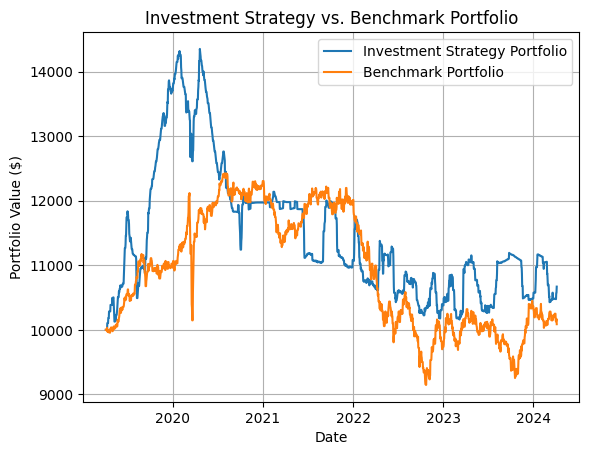

Sharpe Ratio: 1.5387183478032282
Sortino Ratio: 2.836826998505962
Value at Risk (95% confidence): -0.00807288179220388
Annualized Volatility: 0.0745664303694881
Maximum Drawdown: -0.2921908731085513
Skewness: 0.03390165183892613
Portfolio Returns: Date
2019-12-31    0.371415
2020-12-31   -0.127004
2021-12-31   -0.074505
2022-12-31   -0.063444
2023-12-31    0.010525
2024-12-31    0.017394
Freq: YE-DEC, Name: Portfolio Value, dtype: float64
{'XOM': 10, 'AAPL': 7, 'UNH': 14, 'NVDA': 13, 'LLY': 28, 'V': 14, 'JPM': 8, 'TSLA': 0, 'AMZN': 13}
73.77899999999845


In [378]:
import pandas as pd
import matplotlib.pyplot as plt

# Load merged data
merged_df = pd.read_csv('osc_merged.csv', parse_dates=['Date'])
merged_df.set_index('Date', inplace=True)

# Make sure all financial data is float
financial_cols = [col for col in merged_df.columns if 'Price' in col or 'Yield' in col]
merged_df[financial_cols] = merged_df[financial_cols].astype(float)

# Calculate SMAs for each company's spread
companies = set(col.split('-')[0] for col in merged_df.columns if 'Price' in col)
calculate_smas(merged_df)

# Backtest the strategy starting from 5 years ago
start_date = merged_df.index.max() - pd.DateOffset(years=5)
backtest_data = merged_df.loc[start_date:]
portfolio_value_df, holdings, cash = backtest_strategy_with_interest(backtest_data)

# Load and prepare the benchmark data
benchmark = pd.read_csv('benchmark.csv')
benchmark['Date'] = pd.to_datetime(benchmark['Date'], format='%m/%d/%y')
benchmark['BAMLCC0A1AAATRIV'].replace('.', pd.NA, inplace=True)
benchmark.dropna(subset=['BAMLCC0A1AAATRIV'], inplace=True)
benchmark['BAMLCC0A1AAATRIV'] = benchmark['BAMLCC0A1AAATRIV'].astype(float)
benchmark.set_index('Date', inplace=True)
benchmark = benchmark.resample('D').ffill().loc[start_date:]  # Ensure daily data and align dates
init_value = benchmark.iloc[0]
normalized_benchmark = benchmark / init_value
scaled_benchmark = normalized_benchmark * 10000

# Combine the backtest portfolio and benchmark portfolio
# Resample both datasets to ensure consistency
portfolio_value_df = portfolio_value_df.resample('D').ffill()
benchmark = benchmark.resample('D').ffill()

# Combine the backtest portfolio and benchmark portfolio
combined_portfolio_df = pd.concat([portfolio_value_df, scaled_benchmark], axis=1)

# Calculate daily returns
daily_returns = portfolio_value_df['Portfolio Value'].pct_change().dropna()
# Assuming a constant risk-free rate of 0.5% annually for simplicity
annual_returns = (1 + daily_returns).resample('YE').prod() - 1
risk_free_rate_annual = 0.005
trading_days = 252
average_annual_return = annual_returns.mean()
#daily_risk_free_return = risk_free_rate / trading_days
# Calculate excess returns for the Sharpe and Sortino ratios
excess_annual_returns = annual_returns - risk_free_rate_annual

#sharpe
sharpe_ratio = excess_annual_returns.mean() / excess_annual_returns.std() * np.sqrt(trading_days)

#sortino
# Calculate the downside deviation
negative_excess_returns = excess_annual_returns[excess_annual_returns < 0]
downside_deviation = np.sqrt(negative_excess_returns.pow(2).mean())
sortino_ratio = excess_annual_returns.mean() / downside_deviation * np.sqrt(trading_days)

#Value at risk
VaR_95 = daily_returns.quantile(0.05)

#vol
volatility = daily_returns.std() * np.sqrt(trading_days)

#max drawdown
roll_max = portfolio_value_df['Portfolio Value'].cummax()
daily_drawdown = portfolio_value_df['Portfolio Value']/roll_max - 1.0
max_drawdown = daily_drawdown.min()

# #beta
# benchmark_returns = benchmark['BAMLCC0A1AAATRIV'].pct_change().dropna()
# covariance = np.cov(daily_returns, benchmark_returns)[0][1]
# benchmark_variance = benchmark_returns.var()
# beta = covariance / benchmark_variance

#skewness
skewness = daily_returns.skew()

# Plotting the comparison

plt.plot(combined_portfolio_df.index, combined_portfolio_df['Portfolio Value'], label='Investment Strategy Portfolio')
plt.plot(combined_portfolio_df.index, combined_portfolio_df['BAMLCC0A1AAATRIV'], label='Benchmark Portfolio')
plt.title('Investment Strategy vs. Benchmark Portfolio')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()

#portfolio performance metrics and other stats
print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Sortino Ratio: {sortino_ratio}")
print(f"Value at Risk (95% confidence): {VaR_95}")
print(f"Annualized Volatility: {volatility}")
print(f"Maximum Drawdown: {max_drawdown}")
# print(f"Beta: {beta}")
print(f"Skewness: {skewness}")
print(f"Portfolio Returns: {annual_returns}")

# Print final holdings and cash
print(holdings)
print(cash)

In [379]:
fedfunds = pd.read_csv('FEDFUNDS_with_days.csv')
fedfunds['Date'] = pd.to_datetime(fedfunds['Date'])

/var/folders/dc/zvwyc6hj1lb8z33y8dt2g0jw0000gn/T/ipykernel_11173/1588222363.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fedfunds['Date'] = pd.to_datetime(fedfunds['Date'])


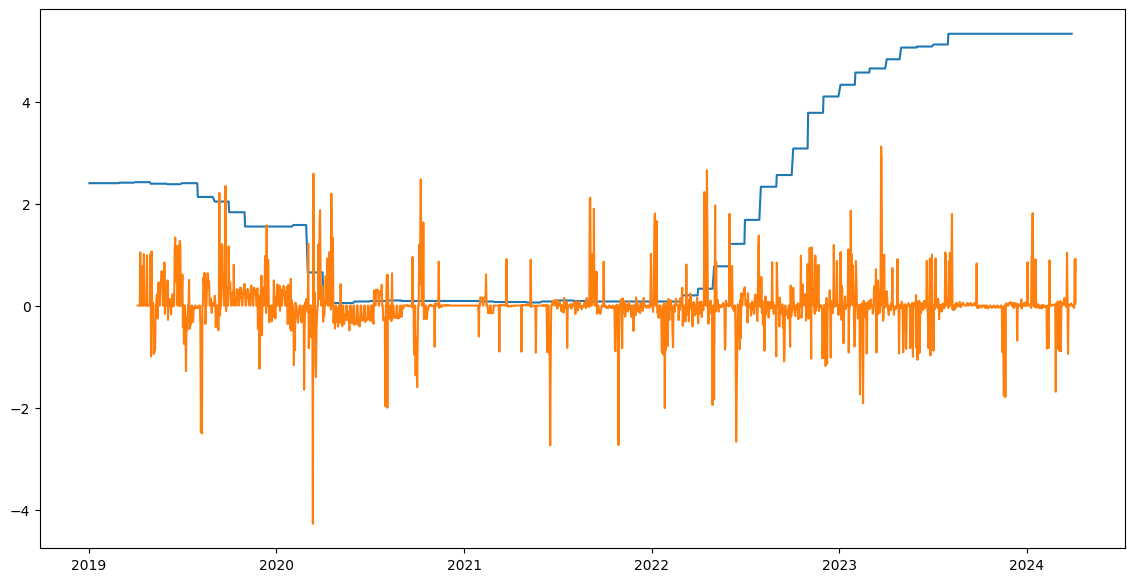

In [380]:
plt.figure(figsize=(14, 7))
plt.plot(fedfunds['Date'], fedfunds['Fed Funds Rate'])
plt.plot(daily_returns*100)